Test with one run for each propgation model

In [10]:
# Define file paths
#D2D_GWN = "../../reports/D2D_MalwarePropagation_GAM/infection_log.json"
D2D_RWP = "../../reports/D2D_MalwarePropagation_RWP/infection_log.json"
#Epd_GWN = "../../reports/Epd_MalwarePropagation_GAM/infection_log.json"
#Epd_RWP = "../../reports/Epd_MalwarePropagation_RWP/infection_log.json"

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Function to load JSON into Pandas DataFrame
def load_infection_data(file_path, label):
    with open(file_path, "r") as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)
    df["scenario"] = label  # Add a column to differentiate the scenarios
    return df

# Load both datasets
df_D2D_GWN = load_infection_data(D2D_GWN, "D2D_GWN")
df_D2D_RWP = load_infection_data(D2D_RWP, "D2D_RWP")
df_Epd_GWN = load_infection_data(Epd_GWN, "Epd_GWN")
df_Epd_RWP = load_infection_data(Epd_RWP, "Epd_RWP")

# Combine both datasets for easier plotting
df = pd.concat([df_D2D_GWN, df_D2D_RWP, df_Epd_GWN, df_Epd_RWP])

# Show the first few rows
df.head()

,infected_by,infection_status,malware_active_time,node_postion_at_active_infected,node_id,scenario
0,2,Infected Active,139.0,"(2090.66,1274.05)",95,D2D_GWN
1,4,Infected Active,169.0,"(1679.66,743.46)",52,D2D_GWN
2,2,Infected Active,169.0,"(1919.86,1176.13)",80,D2D_GWN
3,0,Infected Active,169.0,"(3216.69,2166.81)",82,D2D_GWN
4,0,Infected Active,229.0,"(3109.82,2066.59)",43,D2D_GWN


In [13]:
df.columns

Index(['infected_by', 'infection_status', 'malware_active_time',
       'node_postion_at_active_infected', 'node_id', 'scenario'],
      dtype='object')

total number of infected nodes per scenario 

In [14]:
# Count total number of infected nodes per scenario
total_infected = df.groupby("scenario")["node_id"].nunique()

# Display result
total_infected

scenario
D2D_GWN     94
D2D_RWP    995
Epd_GWN     47
Epd_RWP     58
Name: node_id, dtype: int64

visualize how infection spreads over time for both scenarios

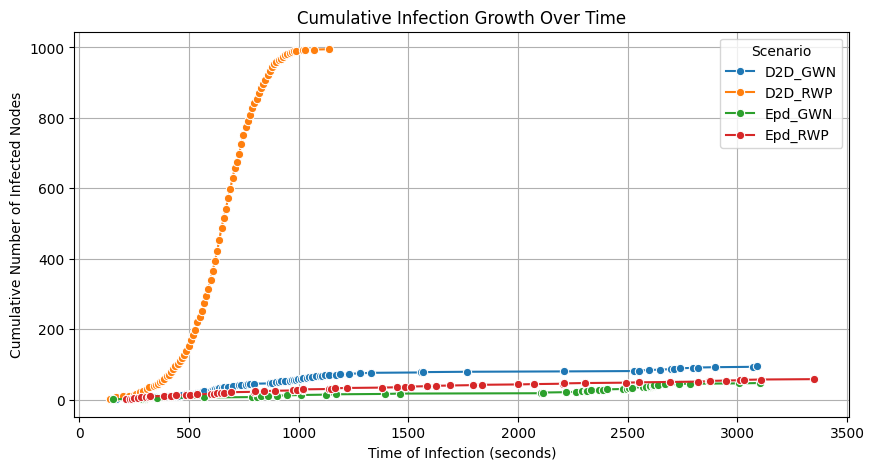

In [15]:
plt.figure(figsize=(10,5))

# Sort by infection time
df_sorted = df.sort_values(by="malware_active_time")

# Compute cumulative infections over time for each scenario
df_sorted["cumulative_infections"] = df_sorted.groupby("scenario").cumcount() + 1

# Line plot of cumulative infections over time
sns.lineplot(data=df_sorted, x="malware_active_time", y="cumulative_infections", hue="scenario", marker="o")

plt.xlabel("Time of Infection (seconds)")
plt.ylabel("Cumulative Number of Infected Nodes")
plt.title("Cumulative Infection Growth Over Time")
plt.legend(title="Scenario")
plt.grid(True)
plt.show()


/tmp/ipykernel_7367/4249282014.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Scenario")


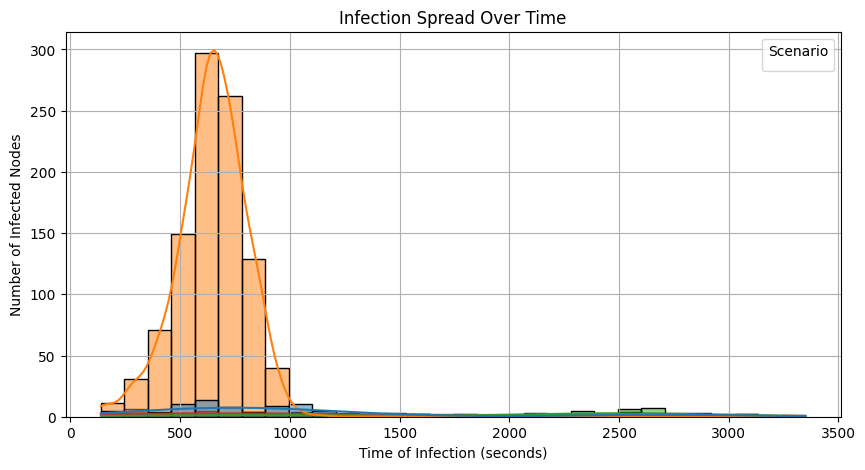

In [16]:
plt.figure(figsize=(10,5))

# Plot infection spread over time for each scenario
sns.histplot(data=df, x="malware_active_time", hue="scenario", bins=30, kde=True)

plt.xlabel("Time of Infection (seconds)")
plt.ylabel("Number of Infected Nodes")
plt.title("Infection Spread Over Time")
plt.legend(title="Scenario")
plt.grid(True)
plt.show()

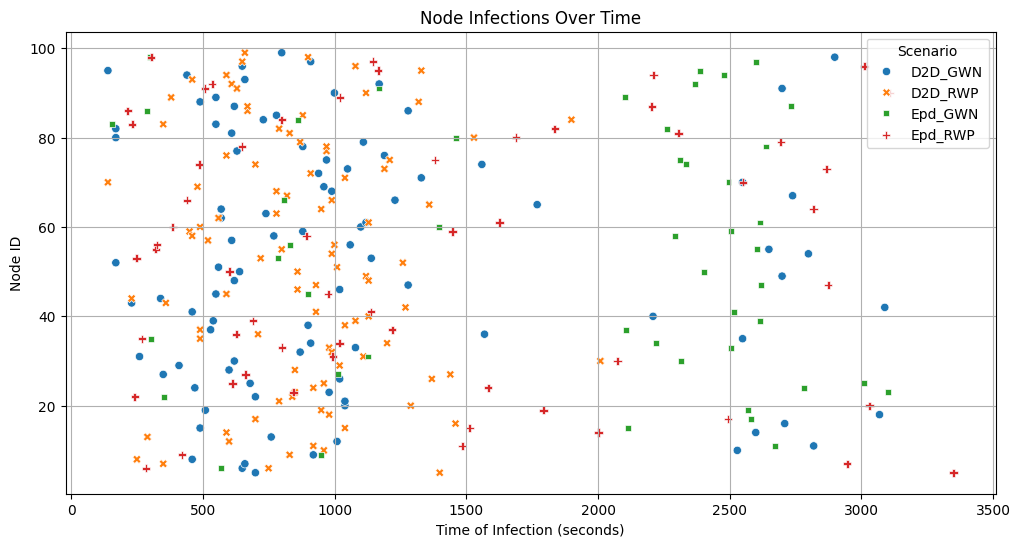

In [8]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=df, x="malware_active_time", y="node_id", hue="scenario", style="scenario")

plt.xlabel("Time of Infection (seconds)")
plt.ylabel("Node ID")
plt.title("Node Infections Over Time")
plt.legend(title="Scenario")
plt.grid(True)
plt.show()


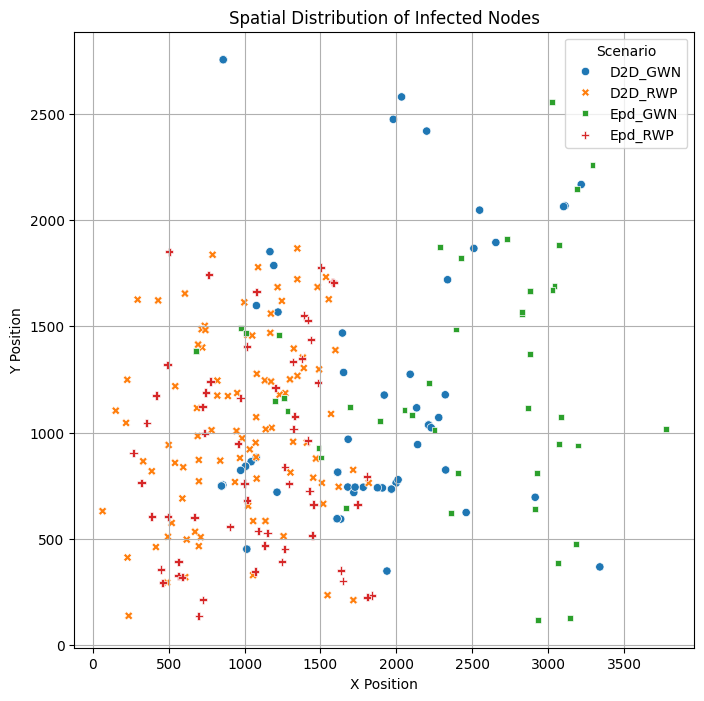

In [9]:
# Convert position from string to separate x and y columns
df[["x_position", "y_position"]] = df["node_postion_at_active_infected"].str.extract(r"\((.*),(.*)\)").astype(float)

# Scatter plot of infected nodes' positions
plt.figure(figsize=(8, 8))

sns.scatterplot(data=df, x="x_position", y="y_position", hue="scenario", style="scenario")

plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Spatial Distribution of Infected Nodes")
plt.legend(title="Scenario")
plt.grid(True)
plt.show()
